# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the csv file

In [2]:
df = pd.read_csv("car_age_price.csv")

In [3]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# exploring the data

In [4]:
df.shape

(112, 2)

In [5]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
df.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
df['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000])

In [9]:
df['Price'].nunique()

35

In [10]:
df['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [11]:
df['Year'].nunique()

8

# finding the strength of Linear Realtionship between Year and Price

In [12]:
df.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


<AxesSubplot:>

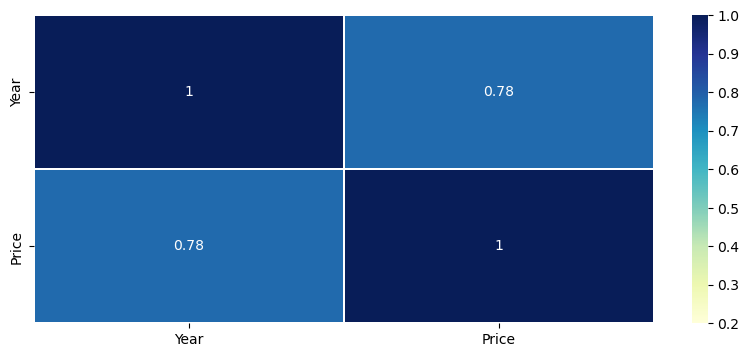

In [13]:
corrmatrix = df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=0.2,vmax=1,linewidth=0.3,cmap='YlGnBu')

#### Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated.The output above shows presence of strong linear correlation between the  variables Year and Price

# visualizing the data

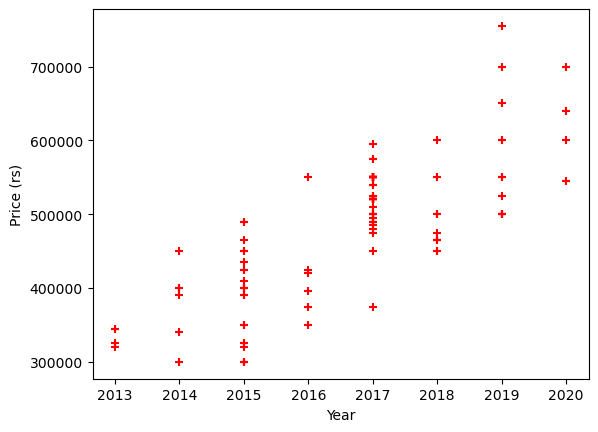

In [14]:
%matplotlib inline
plt.xlabel ('Year')
plt.ylabel('Price (rs)')
plt.scatter(df.Year,df.Price,color='red',marker='+')

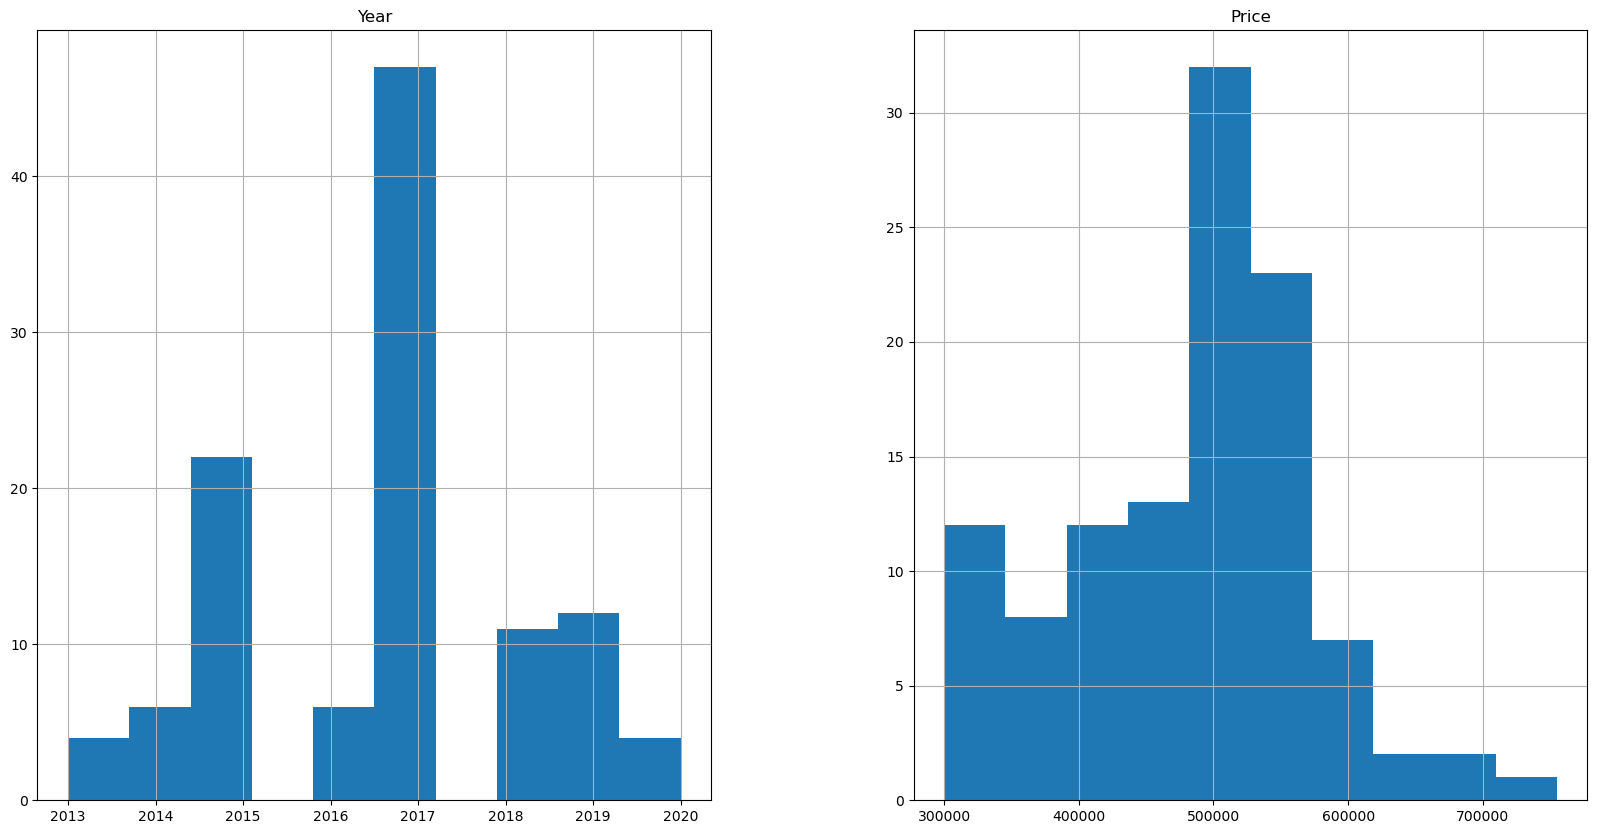

In [15]:
freqgraph = df.select_dtypes(include=['int64'])
freqgraph.hist(figsize=(20,10))
plt.show()

In [16]:
y = df['Price']
x = df.drop(['Price'],axis=1)

In [17]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [18]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

# spliting for training and testing

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [20]:
x_train.shape

(84, 1)

In [21]:
y_train.shape

(84,)

# creating linear regression model

In [22]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [23]:
model1 = lr.fit(x_train,y_train)

In [24]:
model1

LinearRegression()

In [25]:
y_pred = model1.predict(x_test)

In [26]:
y_pred

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

# prediciting price of 2022

In [27]:
model1.predict([[2022]])

/Users/adithyamp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([740160.11937766])

# MSE and R2 score of model1

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is : ',r2_score(y_test,y_pred))

MSE is :  3878767151.073449
R2 is :  0.4347961632108023


# creating lasso regression model

In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso (alpha=1.0)

In [30]:
model2=lasso.fit (x_train,y_train)

In [31]:
model2

Lasso()

In [32]:
y_pred = lasso.predict (x_test)

In [33]:
y_pred

array([599222.10828854, 505264.87581331, 552243.49205092, 552243.49205092,
       552243.49205092, 411307.64333805, 505264.87581331, 552243.49205092,
       599222.10828854, 599222.10828854, 317350.4108628 , 505264.87581331,
       411307.64333805, 646200.72452617, 552243.49205092, 599222.10828854,
       317350.4108628 , 411307.64333805, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 411307.64333805, 411307.64333805])

# prediciting price of 2022

In [34]:
model2.predict([[2022]])

/Users/adithyamp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([740157.95700142])

# MSE and R2 score of model2

In [35]:
print('MSE is : ',mean_squared_error(y_test,y_pred))
print('R2 is : ',r2_score(y_test,y_pred))

MSE is :  3878735896.222091
R2 is :  0.4348007175862566


### model with low MSE value have better perfomance which implies lasso regression model (model2) is better performing than linear regression model (model1)